# Homework - week 1
## python and numpy exercises

Homeworks can be done in a group.

Please, create a github account and upload your colab notebook.
Send me the link to the repository.


Sometimes I ask to use a specific numpy function.
Go to the documentation to check how it works
https://numpy.org/doc/1.25/reference/index.html#reference


***Exercise 1: Matrix Multiplication***

Description: Write a function to perform matrix multiplication using NumPy.
Use

```
np.dot(A,B)
#the transpose of a matrix can be fuond using np.transpose() or A.T
```


When dimentions do not match you can transpose, this exercise is about array manipulation and we don't care about the result

In [ ]:
import numpy as np

def matrixmult(A,B):
  if A.shape[1]!=B.shape[0]:
    C = B.T
    B = C
  mult = np.dot(A, B)
  return mult


In [ ]:
import numpy as np
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
C = np.random.rand(4,2)
D =  np.random.rand(4,4)


In [ ]:
# AxB

mult1 = matrixmult(A,B)

#AxC

mult2 = matrixmult(A,C)

#(BxC)xD

mult3 = matrixmult(B,C)
mult4 = matrixmult(mult3,D)

***Exercise 2: Matrix creation***

Description: Write a function to define a matrix following the instruction



1.   Create a random matrix 8x8 with only negative elements. The principal diagonal must have all elements < -1 . All other elements are < 0 and > -1
```
#useful functions
np.diag()#diagonal matrix
np.randon.rand()#generates number between 0 and 1, it has size argument
#remenber that you can sum matrices and multiply them with a scalar
```

2.   Create a random tensor NxMx3.
The third dimention is usually called the channel dimention (like color channels in an image).

The first channel i.e. A[:,:,0] has only radom positive values.

The second channel has values distributed as a gaussian with mean = 3 and standard deviation = 1.

The third channel has the element by element sum of squares of the first two channels.

Both N and M are user defined.
```
#useful functions
np.abs()#take the absolute value of a number (it works on tensor)
np.randon.randn()#generates normal distibuted numbers
np.concatenate() # concatenate dimentions
# also you can use stack to merge channels
np.stack()
```

3. Generate a 8x8 matrix. The fist element is 1, the second one is 2 ...., the last element is 64.

```
# you can use arange to generate numbers in a range
np.arange()
# you can reshape a vector in a matrix...
```





In [ ]:
import random

def matrix1(dim):
  x = []
  for i in range(dim):
    mult = random.randint(2,10)
    num_diag = -1 * mult * np.random.random()

    x.append(num_diag)

  matrix_diag = np.ones((dim,dim))
  np.fill_diagonal(matrix_diag, x)

  for i in range(dim):
    for j in range(dim):
      if matrix_diag[i][j] == 1:
        matrix_diag[i][j] = -1 * np.random.random()
      else:
        pass

  return matrix_diag
matrix1(8)

array([[-1.51047998, -0.59176753, -0.69607572, -0.67974926, -0.35266886,
        -0.34691874, -0.08272985, -0.70358195],
       [-0.32866437, -2.13334706, -0.15999319, -0.48170313, -0.51008753,
        -0.53505391, -0.98443707, -0.50785179],
       [-0.21413024, -0.71381035, -4.12259395, -0.77375252, -0.36740674,
        -0.05885655, -0.09481234, -0.05023735],
       [-0.22201731, -0.9791848 , -0.86959296, -0.73854942, -0.80088449,
        -0.59767689, -0.33195776, -0.93153327],
       [-0.74332332, -0.63841959, -0.34026711, -0.54038112, -2.36831696,
        -0.2909534 , -0.83889763, -0.57727466],
       [-0.99405093, -0.76665789, -0.95655527, -0.51932927, -0.66972158,
        -1.77803824, -0.85080454, -0.41016179],
       [-0.80645852, -0.94357849, -0.3290559 , -0.99263516, -0.80564612,
        -0.21327099, -2.57275901, -0.06350504],
       [-0.38750456, -0.90984735, -0.00833788, -0.03224418, -0.05271201,
        -0.14131349, -0.42471714, -1.61828518]])

***Exercise 4: Decision Boundaries***


Description: I will provide an example to:
- Generate data
- Split the data
- Train a classifier
- Record performance
- Plot the decision curves on a plane

 Using this template, generate the dataset described and compare the results of linear regression and K-NN. You can try different models also.


K-NN accuracy: 0.8
Logistic Regression accuracy: 0.825


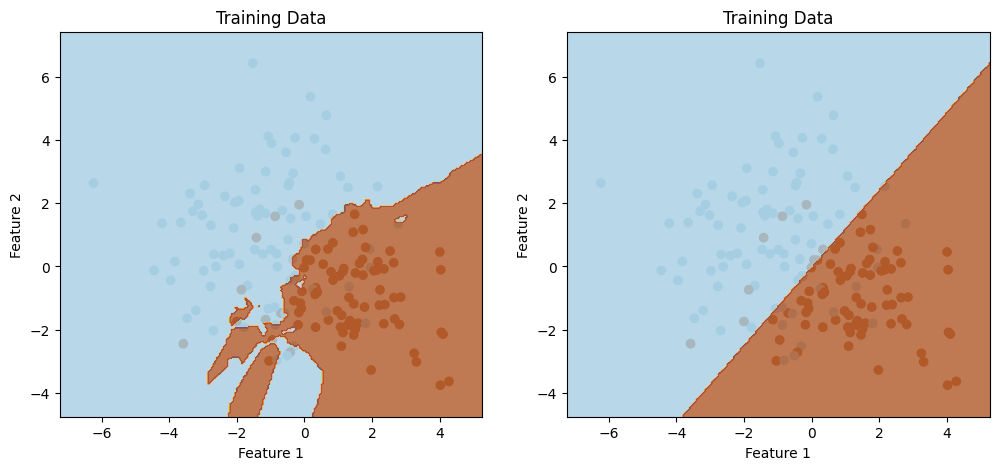

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data with linear decision boundary
np.random.seed(42)

# Number of data points per class
num_samples = 100

# Generate two classes with linear decision boundary
class_0_mean = [-1, 1]
class_0_cov = [[4, 0], [0, 4]]
class_1_mean = [1, -1]
class_1_cov = [[2, 0], [0, 2]]

class_0_data = np.random.multivariate_normal(class_0_mean, class_0_cov, num_samples)
class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# Combine the data and labels
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary( X_train,knn,log_reg):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  h = .05  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.subplot(1, 2, 2)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.show()

# plot boundaries
plot_boundary( X_train,knn,log_reg)

***part I: Linearly separable datasets ***


A,B,C,D are gaussian distributions with $$mean = \mu$$ and $$cov = \alpha*\sigma$$.

For simplicity assume a diagonal covariance matrix.

$\alpha$ is a user defined parameter. Fix it at 0.5 at start


$$\mu_A = [1,1] $$
$$\mu_B = [0,0] $$
$$\mu_C = [-1,-1]$$
$$\mu_D = [1,-1]$$


Dataset 1 has point of class 0 sampled from A and B and points of class one sampled from C


Dataset 2 has points of class 0 sampled from A and C and points of class one sampled from B


Dataset 3 haspoints of class 0 sampled from A and C and points of class one sampled from D


<ipython-input-2-574b341d877b>:24: RuntimeWarning: covariance is not positive-semidefinite.
  class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)


K-NN accuracy: 0.975
Logistic Regression accuracy: 0.975


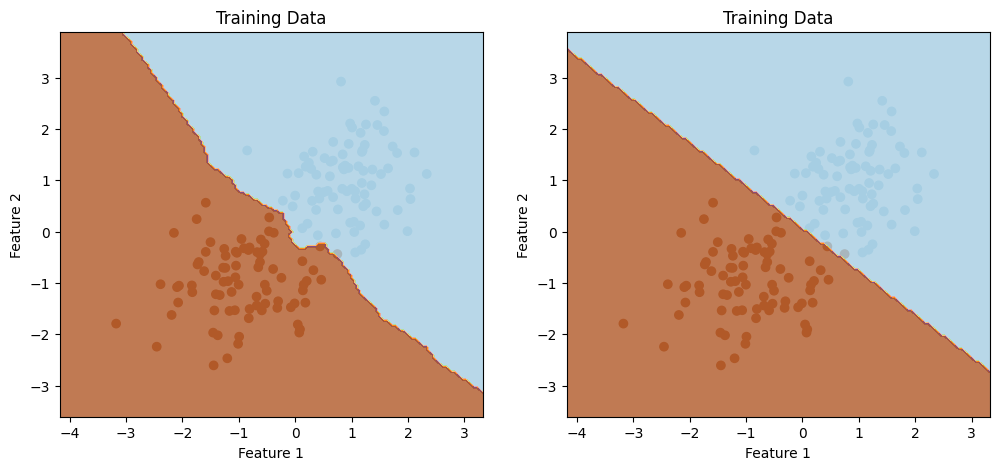

In [ ]:
#Dataset1

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data with linear decision boundary
np.random.seed(42)

# Number of data points per class
num_samples = 100

# Generate two classes with linear decision boundary
class_0_mean_A = [1, 1]
class_0_cov_A = [[0.5, 0], [0, 0.5]]
class_0_mean_B = [0, 0]
class_0_cov_B = [[0, 0], [0, 0]]
class_1_mean = [-1, -1]
class_1_cov = [[-0.5, 0], [-0, -0.5]]

class_0_data_A = np.random.multivariate_normal(class_0_mean_A, class_0_cov_A, num_samples)
class_0_data_B = np.random.multivariate_normal(class_0_mean_B, class_0_cov_B, num_samples)
class_1_data = np.random.multivariate_normal(class_1_mean, class_1_cov, num_samples)
class_0_data = class_0_data_A + class_0_data_B

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# Combine the data and labels
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary( X_train,knn,log_reg):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  h = .05  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.subplot(1, 2, 2)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.show()

# plot boundaries
plot_boundary( X_train,knn,log_reg)

<ipython-input-6-45a276647c4e>:27: RuntimeWarning: covariance is not positive-semidefinite.
  class_0_data_B = np.random.multivariate_normal(class_0_mean_C, class_0_cov_C, num_samples)


K-NN accuracy: 0.95
Logistic Regression accuracy: 0.675


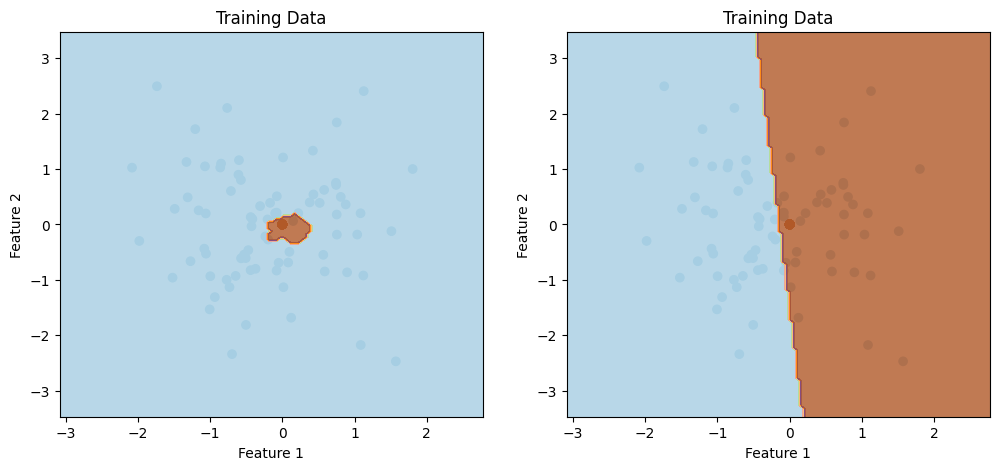

In [ ]:
#Dataset2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data with linear decision boundary
np.random.seed(42)

# Number of data points per class
num_samples = 100

# Generate two classes with linear decision boundary
class_0_mean_A = [1, 1]
class_0_cov_A = [[0.5, 0], [0, 0.5]]
class_1_mean_B = [0, 0]
class_1_cov_B = [[0, 0], [0, 0]]
class_0_mean_C = [-1, -1]
class_0_cov_C = [[-0.5, 0], [0, -0.5]]
class_1_mean_D = [1, -1]
class_1_cov_D = [[0.5, 0], [0, 0.5]]

class_0_data_A = np.random.multivariate_normal(class_0_mean_A, class_0_cov_A, num_samples)
class_0_data_B = np.random.multivariate_normal(class_0_mean_C, class_0_cov_C, num_samples)
class_1_data = np.random.multivariate_normal(class_1_mean_B, class_1_cov_B, num_samples)
class_0_data = class_0_data_A + class_0_data_C

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# Combine the data and labels
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary( X_train,knn,log_reg):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  h = .05  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.subplot(1, 2, 2)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.show()

# plot boundaries
plot_boundary( X_train,knn,log_reg)

<ipython-input-7-a01ffa5bf8d2>:27: RuntimeWarning: covariance is not positive-semidefinite.
  class_0_data_B = np.random.multivariate_normal(class_0_mean_C, class_0_cov_C, num_samples)


K-NN accuracy: 0.8
Logistic Regression accuracy: 0.9


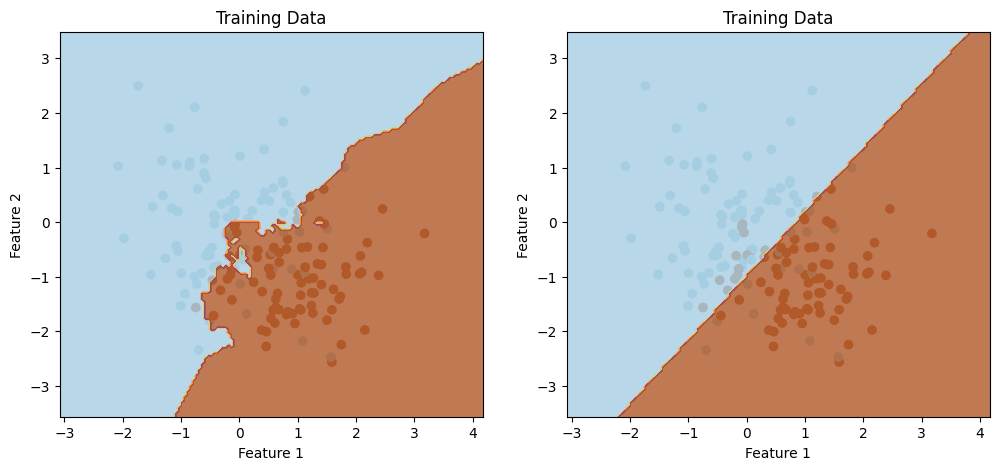

In [ ]:
#Dataset3

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data with linear decision boundary
np.random.seed(42)

# Number of data points per class
num_samples = 100

# Generate two classes with linear decision boundary
class_0_mean_A = [1, 1]
class_0_cov_A = [[0.5, 0], [0, 0.5]]
class_1_mean_B = [0, 0]
class_1_cov_B = [[0, 0], [0, 0]]
class_0_mean_C = [-1, -1]
class_0_cov_C = [[-0.5, 0], [0, -0.5]]
class_1_mean_D = [1, -1]
class_1_cov_D = [[0.5, 0], [0, 0.5]]

class_0_data_A = np.random.multivariate_normal(class_0_mean_A, class_0_cov_A, num_samples)
class_0_data_B = np.random.multivariate_normal(class_0_mean_C, class_0_cov_C, num_samples)
class_1_data = np.random.multivariate_normal(class_1_mean_D, class_1_cov_D, num_samples)
class_0_data = class_0_data_A + class_0_data_C

# Create the target labels (0 and 1)
class_0_labels = np.zeros(num_samples)
class_1_labels = np.ones(num_samples)

# Combine the data and labels
X = np.vstack((class_0_data, class_1_data))
y = np.hstack((class_0_labels, class_1_labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# Plot the decision boundary for K-NN and Logistic Regression
def plot_boundary( X_train,knn,log_reg):
  plt.figure(figsize=(12, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  h = .05  # step size in the mesh
  x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
  y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.subplot(1, 2, 2)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
  plt.title("Training Data")
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  #plt.xlim(-6, 6)
  #plt.ylim(-6, 6)

  Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)

  plt.show()

# plot boundaries
plot_boundary( X_train,knn,log_reg)

*part II: Non Linearly separable datasets *

Here there is an example of a common toy dataset generated with sk-learn.

https://scikit-learn.org/stable/datasets/sample_generators.html#generated-datasets

Modify the code to work with make_circle instead. (it is a line).

Play with both datasets.

K-NN accuracy: 1.0
Logistic Regression accuracy: 0.9


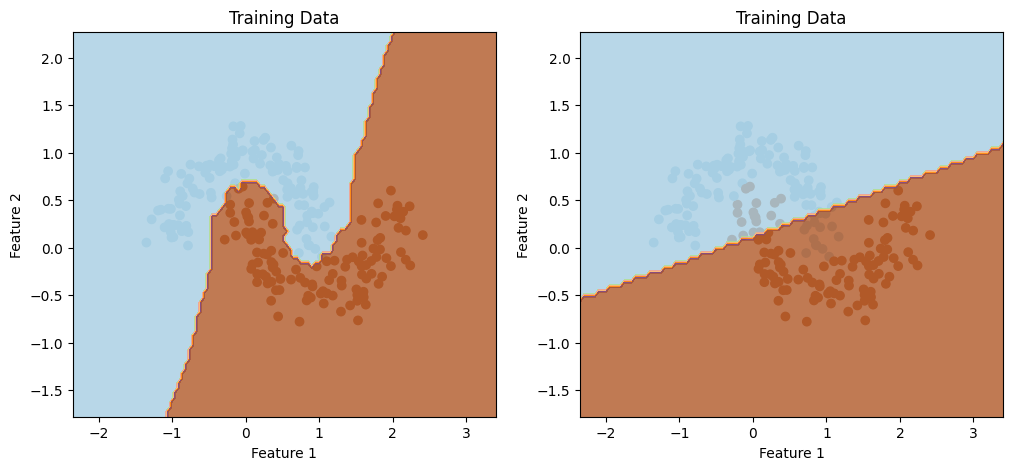

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Generate synthetic data with a non-linear decision boundary
np.random.seed(42)

# Number of data points
num_samples = 300

# Generate non-linearly separable data using the function
X, y = make_moons(n_samples=num_samples, noise=0.15, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# plot boundaries
plot_boundary( X_train,knn,log_reg)

K-NN accuracy: 0.5833333333333334
Logistic Regression accuracy: 0.4166666666666667


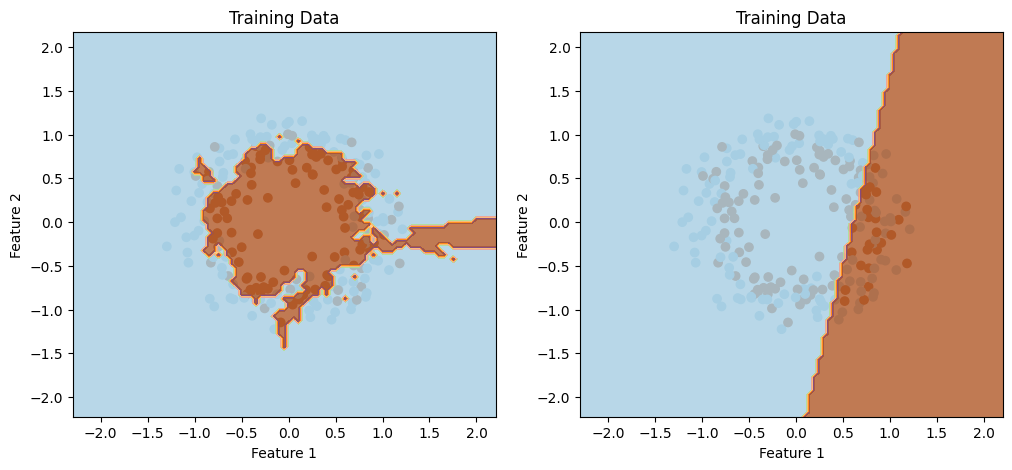

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Generate synthetic data with a non-linear decision boundary
np.random.seed(42)

# Number of data points
num_samples = 300

# Generate non-linearly separable data using the function
X, y = make_circles(n_samples=num_samples, noise=0.15, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the models
knn = KNeighborsClassifier(n_neighbors=5)  # K-NN classifier
log_reg = LogisticRegression()  # Logistic Regression

knn.fit(X_train, y_train)
log_reg.fit(X_train, y_train)

# Predict using the models
y_pred_knn = knn.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

print("K-NN accuracy:", accuracy_knn)
print("Logistic Regression accuracy:", accuracy_log_reg)

# plot boundaries
plot_boundary( X_train,knn,log_reg)

# An example of a situation in which LR is better than K-NN




It is difficult to compete with K-NN,as an algorithm, it is clearly superior to logistic regression because it is non linear, it can take into account all the correlations between features and it can “draw” arbitrary decision boundaries.
Its weaknesses are the speed in inference when you have a big dataset and that  it is noisy when you have small datasets.

To build a toy dataset in which LR is better than  K-NN we can
- Generate random normal dataset (N = 200) with high variance and covariance in a high dimensional space (D = 20).
- Create a linear decision boundary only on a low dimensional projection (D=2 in this case, the first two features)

K-NN performance also depend strongly on its hyperparameter k (the number of point that are considered neighbours)

Try to modify this code to find the best k in this case:

- Split the train dataset in train/validation
- Try all (loop over it) k = [1,20] recording performances on the validation set
Plot Accuracy vs k and find k* the k at which accuracy is maximum
- Test the model using k*


*** NB. The first figure is the covariance matrix,

the second is the scatterplot on the projection in which the decison line is

the tird one is a different projection ***

You can try to plot the decision boundaries modifing the code that I made but it is expensive because you would have to create a grid of points in a D=20 space.

You can however:
 - generate the grid only on D = 1,2 (where the boundary is) and D = 3,4 where there is no boundary
 - then add a constant value to all other dimensions (usually the average)
 - use this dataset to plot the decision plane

Correlation between correlated variables and y:
[ 0.52316271 -0.53521938  0.11227375  0.07977273 -0.03206579 -0.03710605
 -0.16271314  0.07883415 -0.31962408 -0.15046099  0.19715818 -0.01263753
 -0.01044685  0.09805314  0.15776423  0.03625433  0.31390612  0.00665709
 -0.09783846  0.19742295]
K-NN accuracy: 0.7
K-NN accuracy: 0.675
K-NN accuracy: 0.65
K-NN accuracy: 0.7
K-NN accuracy: 0.65
K-NN accuracy: 0.65
K-NN accuracy: 0.625
K-NN accuracy: 0.675
K-NN accuracy: 0.65
K-NN accuracy: 0.675
K-NN accuracy: 0.65
K-NN accuracy: 0.675
K-NN accuracy: 0.675
K-NN accuracy: 0.7
K-NN accuracy: 0.675
K-NN accuracy: 0.675
K-NN accuracy: 0.675
K-NN accuracy: 0.6
K-NN accuracy: 0.65
K-NN accuracy: 0.675


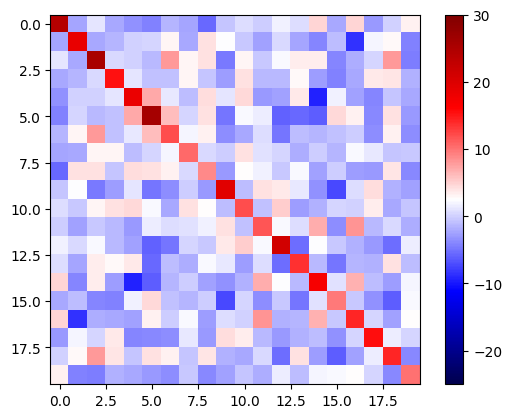

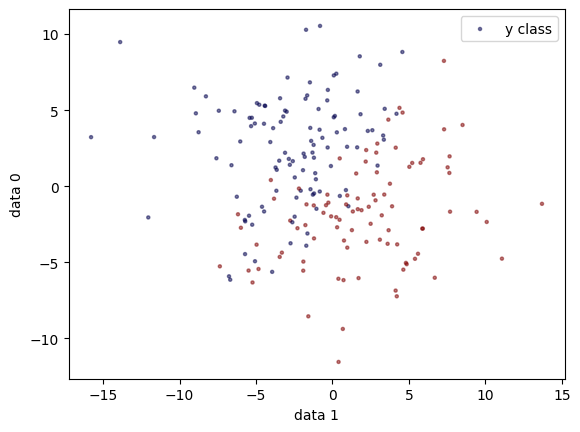

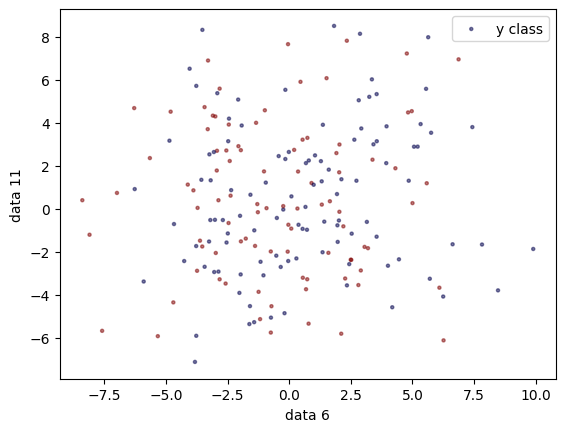

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
np.random.seed(123)

def generate_dataset(N, D, num_samples, W):
    # Generate correlated variables
    covariance_matrix = 1*np.random.randn(N, N)
    diagonal_values = 1*np.ones(N)
    np.fill_diagonal(covariance_matrix, diagonal_values)
    covariance_matrix = 0.8*np.dot(covariance_matrix, covariance_matrix.T)

    # Ensure positive definiteness using Cholesky decomposition
    L = np.linalg.cholesky(covariance_matrix)
    covariance_matrix = np.dot(L, L.T)

    X = np.random.multivariate_normal(np.zeros(N), covariance_matrix, num_samples)

    # Take correlated variables with target
    correlated_vars = X[:,:D]

    # take  uncorrelated variables
    uncorrelated_vars = X[:,D:]



    # Generate target weigths variable y
    weights = np.expand_dims(np.array(W),axis=1)

    # Generate target variable y as a weighted sum of correlated variables
    #y = np.dot(correlated_vars, weights) + 0.15*np.random.randn(num_samples, 1)
    bias = 0.2*np.random.randn()
    logits = np.dot(correlated_vars, weights) + bias
    probabilities = 1 / (1 + np.exp(-logits))
    y = np.random.binomial(1, probabilities)


    # Combine correlated and uncorrelated variables
    X = np.concatenate((correlated_vars, uncorrelated_vars), axis=1)

    # Print correlation between correlated variables and y
    correlations = np.corrcoef(np.concatenate((X, y), axis=1), rowvar=False)
    corr_with_y = correlations[:-1, -1]
    print("Correlation between correlated variables and y:")
    print(corr_with_y)

    y = y.squeeze()


    return X, y,covariance_matrix

# Parameters
N = 20  # Number of total variables
D = 2   # Number of correlated variables
num_samples = 200

# Generate dataset
weights = [0.6,-0.6]
X, y,covariance_matrix = generate_dataset(N, D, num_samples,weights)
plt.imshow(covariance_matrix,cmap="seismic",vmin=-25,vmax=30)
plt.colorbar()

#plot in the separation plane projection
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 1")
plt.ylabel("data 0")
plt.legend()
#plot in a random plane projection
plt.figure()
plt.scatter(X[:,6],X[:,11],c=y,s=5,alpha =0.5,cmap="seismic",label = "y class")
plt.xlabel("data 6")
plt.ylabel("data 11")
plt.legend()
#plt.colorbar()
plt.figure()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_nclass = []
y_pred_knn = []
accuracy_knn = []
# Create and train the models
for k in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=k)  # K-NN classifier
  log_reg = LogisticRegression(penalty='l1',solver="liblinear",C=0.5, max_iter=500)  # Logistic Regression

  k_nclass.append(knn)

  k_nclass[k-1].fit(X_train, y_train)
  log_reg.fit(X_train, y_train)
  #print(log_reg.coef_)

  # Predict using the models

  y_pred_knn.append(k_nclass[k-1].predict(X_test))
  y_pred_log_reg = log_reg.predict(X_test)

  # Calculate accuracy
  accuracy_knn.append(accuracy_score(y_test, y_pred_knn[k-1]))
  accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

  print("K-NN accuracy:", accuracy_knn[k-1])
  #print("Logistic Regression accuracy:", accuracy_log_reg)



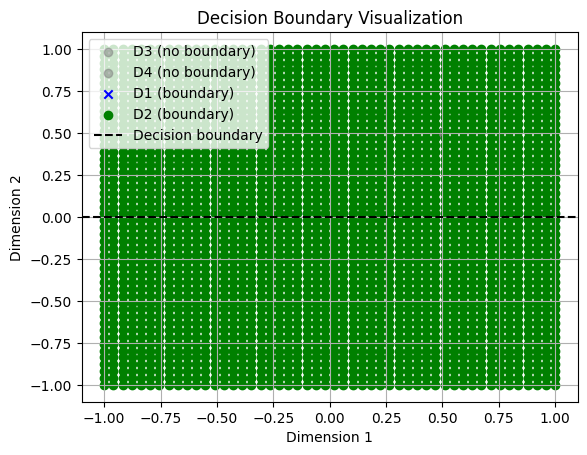

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Generate grid points in 1D and 2D
grid_D1 = np.linspace(-1, 1, 50)
grid_D2_x, grid_D2_y = np.meshgrid(np.linspace(-1, 1, 50), np.linspace(-1, 1, 50))
grid_D2 = np.column_stack((grid_D2_x.ravel(), grid_D2_y.ravel()))

# Add constant value for D3 and D4
constant_value = 0.5
grid_D3 = np.column_stack((np.full(50, constant_value), np.full(50, constant_value)))
grid_D4 = np.column_stack((np.full(2500, constant_value), np.full(2500, constant_value)))

# Plotting
plt.scatter(grid_D3[:, 0], grid_D3[:, 1], color='gray', alpha=0.5, label='D3 (no boundary)')
plt.scatter(grid_D4[:, 0], grid_D4[:, 1], color='gray', alpha=0.5, label='D4 (no boundary)')
plt.scatter(grid_D1, np.zeros_like(grid_D1), color='blue', marker='x', label='D1 (boundary)')
plt.scatter(grid_D2[:, 0], grid_D2[:, 1], color='green', marker='o', label='D2 (boundary)')
plt.axhline(y=0, color='black', linestyle='--', label='Decision boundary')

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.title('Decision Boundary Visualization')
plt.grid()
plt.show()

# Other resources:
you can find a comparison on toy dataset for different ML models on the documentation of sk.learn

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py